In [1]:

!pip install -r requirements.txt
from csv_sql import CSVtoSQL 


# CSVtoSQL

A utility class for handling CSV data and interacting with an SQLite database.

The `CSVtoSQL` class provides an efficient solution for managing CSV data and performing database operations using SQLite. It simplifies the process of working with CSV files and executing SQL queries, enabling seamless integration of CSV data into an SQLite database.

## Key Features

- **CSV Data Analysis:** The `csv_sniffer` method automatically infers the delimiter and column data types from a CSV file. It intelligently detects the structure and characteristics of the data, saving time and effort in manual analysis.

- **Data Import:** The `write_csv_to_sql` method creates an in-memory SQLite database table and imports the contents of a CSV file into the table. It handles the creation of the table schema and efficiently inserts the data, ensuring a smooth and streamlined data import process.

- **SQL Query Execution and Formatting:** The `execute_and_format` method executes SQL queries on the SQLite database and formats the result as a table. It provides a clean and organized representation of query results, making it easy to analyze and interpret the data.

## Advantages over Pandas

While pandas is a popular library for data analysis and manipulation, the `CSVtoSQL` class offers several advantages when it comes to managing CSV data:

1. **Efficient Memory Usage:** The `CSVtoSQL` class utilizes an in-memory SQLite database, allowing for efficient memory usage. This is especially beneficial when dealing with large CSV files that may consume significant memory when loaded into pandas DataFrames.

2. **Streamlined Data Import:** The `write_csv_to_sql` method handles the creation of the database table and data insertion in a streamlined manner. It eliminates the need to manually define the table schema and perform complex data import operations, resulting in a more straightforward and efficient process.

3. **SQL Query Flexibility:** The `execute_and_format` method enables the execution of complex SQL queries on the SQLite database. It provides the flexibility to leverage the full power of SQL for data analysis and manipulation, allowing for more advanced query operations compared to pandas' built-in functions.

4. **Integration with Existing SQL Workflow:** The `CSVtoSQL` class seamlessly integrates with existing SQL workflows. It allows users to leverage their SQL knowledge and skills to work with CSV data, making it easier to transition between different data sources and maintain a consistent workflow.

By utilizing the `CSVtoSQL` class, you can harness the benefits of SQLite and SQL while working with CSV data. It offers efficient memory usage, streamlined data import, SQL query flexibility, and integration with existing SQL workflows. These advantages make it a valuable alternative to using pandas alone for managing and analyzing CSV data.

## Usage Example

Here's an example of how to use the `CSVtoSQL` class:

```python
csv_data = CSVtoSQL()
delimiter, headers, column_data_types = csv_data.csv_sniffer('data.csv')
conn, cursor = csv_data.write_csv_to_sql(delimiter, headers, column_data_types, 'my_table', 'data.csv')
result_table, rows = csv_data.execute_and_format(conn, 'SELECT * FROM my_table')
print(result_table)
print(rows)

# By utilizing the `CSVtoSQL` class, I am demonstrating my SQL skills by efficiently managing and analyzing CSV data within an SQLite database. Additionally, I am showcasing the following advantages over using pandas alone:
# - Efficient Memory Usage: The in-memory SQLite database reduces memory consumption when working with large CSV files.
# - Streamlined Data Import: The `write_csv_to_sql` method simplifies the process of creating the table schema and inserting data.
# - SQL Query


In [2]:
import os
import glob
import urllib.request
from IPython.display import display, HTML
from tabulate import tabulate
import seaborn as sns
import pandas as pd

This notebook will pull the data from the CMS URL and then visualize the content of it by grouping and splitting it based on various attributes. SQL queries are used for splitting and grouping, while the **pandas and seaborn libraries are only used for visualization at the end**.


In [3]:
directory = "./csv"  # Directory path
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory created")
else:
    print("Directory already exists")

Directory already exists


In [4]:
url = "https://data.cms.gov/provider-data/sites/default/files/resources/69a75aa9d3dc1aed6b881725cf0ddc12_1685750720/DAC_NationalDownloadableFile.csv"
# I am selecting a file which contains various attributes of the NPIs i.e. from where they did their studies, specialty etc.

In [5]:
file_name = "test.csv"
file_path = file_path = os.path.normpath(os.path.join(directory, file_name)) # Normalize the path to make it platform independent

In [6]:
urllib.request.urlretrieve(url, file_path)
# download and dump in the file_path as test.csv 

('csv/test.csv', <http.client.HTTPMessage at 0x7f8a69b148e0>)

In [7]:
csv_file_name = glob.glob(file_path)
#find the csv file in the csv folder 

In [8]:
csv_file = csv_file_name[0]
delimiter,header,column_types= CSVtoSQL.csv_sniffer(csv_file)
delimiter, headers, column_data_types = CSVtoSQL.csv_sniffer(csv_file)
conn, cursor = CSVtoSQL.write_csv_to_sql(delimiter, headers, column_data_types, "my_table", csv_file)
result,rw,hd = CSVtoSQL.execute_and_format(conn, "SELECT * FROM my_table limit 5;")


display(HTML(tabulate(rw, headers=hd, tablefmt="html", stralign='center')))

description = CSVtoSQL.describe(conn,"my_table")

print(description)
# This is the description of my_table

res_gp,rw_1,hd_1  = CSVtoSQL.execute_and_format(conn,"select sec_spec_1,count(NPI) as counts_of_NPI\n\
                                       from my_table\n\
                                        group by sec_spec_1\n\
                                           having sec_spec_1 is not ''\n\
                                      order by counts_of_NPI ASC")

display(HTML(tabulate(rw_1[0:10], headers=hd_1, tablefmt="html", stralign='center')))





NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,Telehlth,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,ind_assgn,grp_assgn,adrs_id
1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,,,M,,OTHER,1994,HOSPITALIST,INTERNAL MEDICINE,,,,INTERNAL MEDICINE,,ADFINITAS HEALTH AT UMCAP LLC,840677738,40,901 HARRY S TRUMAN DR,,,LARGO,MD,207745477,2406771000,Y,Y,MD207745477LA901XXDRXX500
1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,,,M,,OTHER,1994,HOSPITALIST,INTERNAL MEDICINE,,,,INTERNAL MEDICINE,,JOHNS HOPKINS COMMUNITY PHYSICIANS,8325943707,534,14207 PARK CTR DR,SUITE 102,,LAUREL,MD,207075255,3016045254,Y,Y,MD207075255LA14207DRXX402
1003000126,7517003643,I20130530000085,ENKESHAFI,ARDALAN,,,M,,OTHER,1994,HOSPITALIST,INTERNAL MEDICINE,,,,INTERNAL MEDICINE,,JOHNS HOPKINS COMMUNITY PHYSICIANS,8325943707,534,8600 OLD GEORGETOWN RD,,,BETHESDA,MD,208141422,,Y,Y,MD208141422BE8600XRDXX400
1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,,,M,,OTHER,1994,INTERNAL MEDICINE,,,,,,,"MARY WASHINGTON MEDICAL GROUP HOSPITALIST SERVICES, LLC",1456629369,85,1001 SAM PERRY BLVD,,,FREDERICKSBRG,VA,224014453,5407414350,Y,Y,VA224014453FR1001XBLVD400
1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,,M,,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003,PATHOLOGY,,,,,,,NORTH SHORE UNIVERSITY HEALTHSYSTEM FACULTY PRACTICE ASSOCIATES,2163334699,1428,2100 PFINGSTEN RD,,,GLENVIEW,IL,600261301,,Y,Y,IL600261301GL2100XRDXX300


+---------------+-------------+------------+
| Column Name   | Data Type   | Nullable   |
+===============+=============+============+
| NPI           | str         | No         |
+---------------+-------------+------------+
| Ind_PAC_ID    | str         | No         |
+---------------+-------------+------------+
| Ind_enrl_ID   | str         | No         |
+---------------+-------------+------------+
| lst_nm        | str         | No         |
+---------------+-------------+------------+
| frst_nm       | str         | No         |
+---------------+-------------+------------+
| mid_nm        | str         | No         |
+---------------+-------------+------------+
| suff          | str         | No         |
+---------------+-------------+------------+
| gndr          | str         | No         |
+---------------+-------------+------------+
| Cred          | str         | No         |
+---------------+-------------+------------+
| Med_sch       | str         | No         |
+---------

sec_spec_1,counts_of_NPI
PODIATRY,26
CHIROPRACTIC,35
HEMATOPOIETIC CELL TRANSPLANTATION AND CELLULAR THERAPY,51
OPTOMETRY,69
ADULT CONGENITAL HEART DISEASE (ACHD),90
DENTIST,130
RADIATION ONCOLOGY,145
MEDICAL TOXICOLOGY,169
MEDICAL GENETICS AND GENOMICS,192
OTOLARYNGOLOGY,216


# I will only use pandas for plotting and to visualize the explore the data

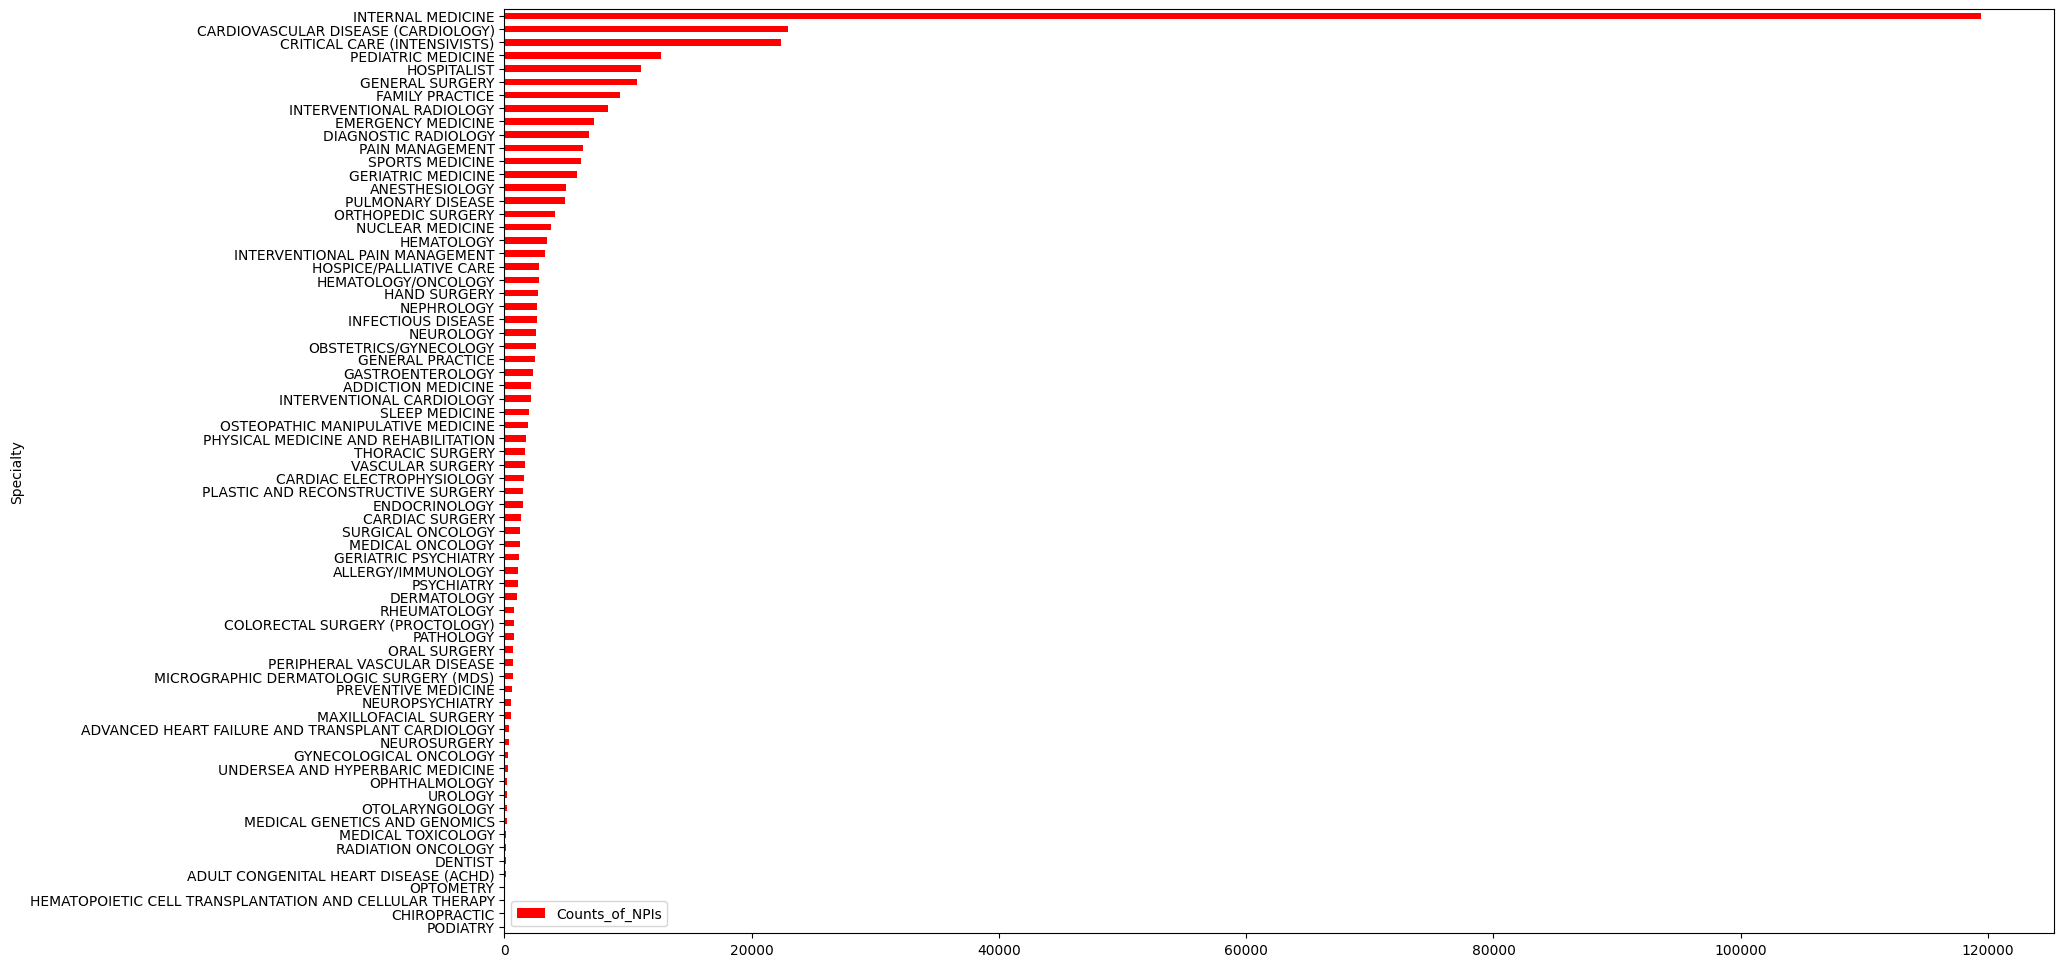

In [9]:
pd.DataFrame(rw_1,columns=['Specialty','Counts_of_NPIs']).plot(kind='barh',x='Specialty',y='Counts_of_NPIs',figsize=(20,12),color='red')

res_gp_2,rw_2,hd_2  = CSVtoSQL.execute_and_format(conn,"select Grd_yr,count(NPI) as counts_of_NPI\n\
                                       from my_table\n\
                                        group by Grd_yr\n\
                                       having Grd_yr is not ''\n\
                                      order by counts_of_NPI DESC")

In [10]:
display(HTML(tabulate(rw_2[0:10], headers=hd_2,tablefmt="html", stralign='center')))

Grd_yr,counts_of_NPI
2016,94960
2015,92696
2014,92526
2017,91232
2013,88833
2018,86675
2012,83114
2011,79507
2019,77859
2010,76074


<Axes: xlabel='Grd_yr'>

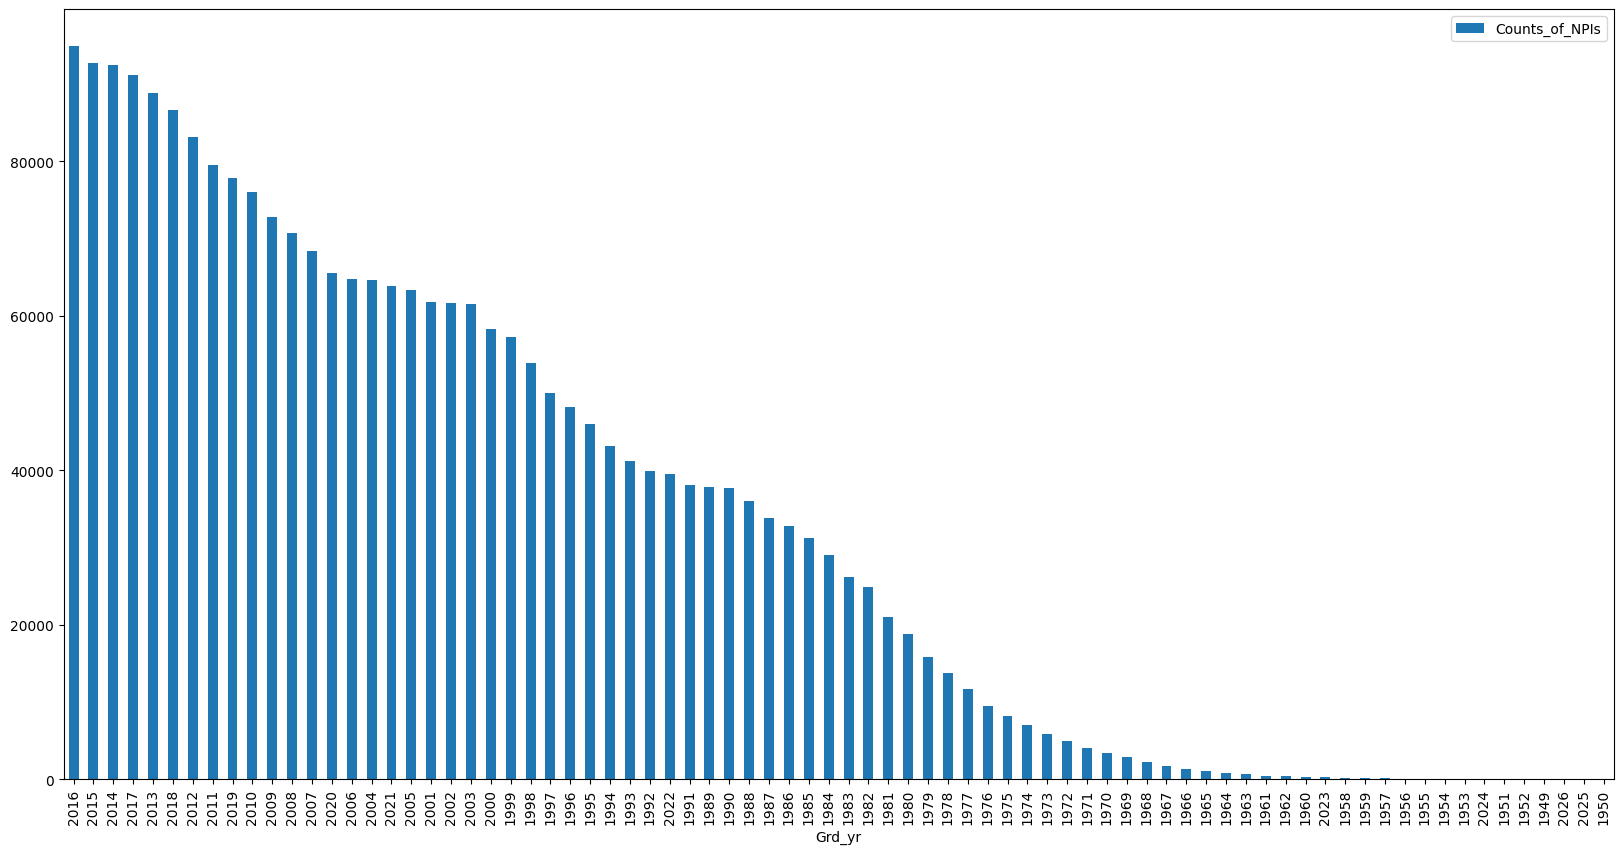

In [11]:
pd.DataFrame(rw_2,columns=['Grd_yr','Counts_of_NPIs']).plot(kind='bar',x='Grd_yr',y='Counts_of_NPIs',figsize=(20,10))

In [12]:
res_gp_3,rw_3,hd_3  = CSVtoSQL.execute_and_format(conn,"select st,count(NPI) as counts_of_NPI\n\
                                       from my_table\n\
                                        group by st\n\
                                       having st is not ''\n\
                                      order by counts_of_NPI DESC")

<Axes: xlabel='State'>

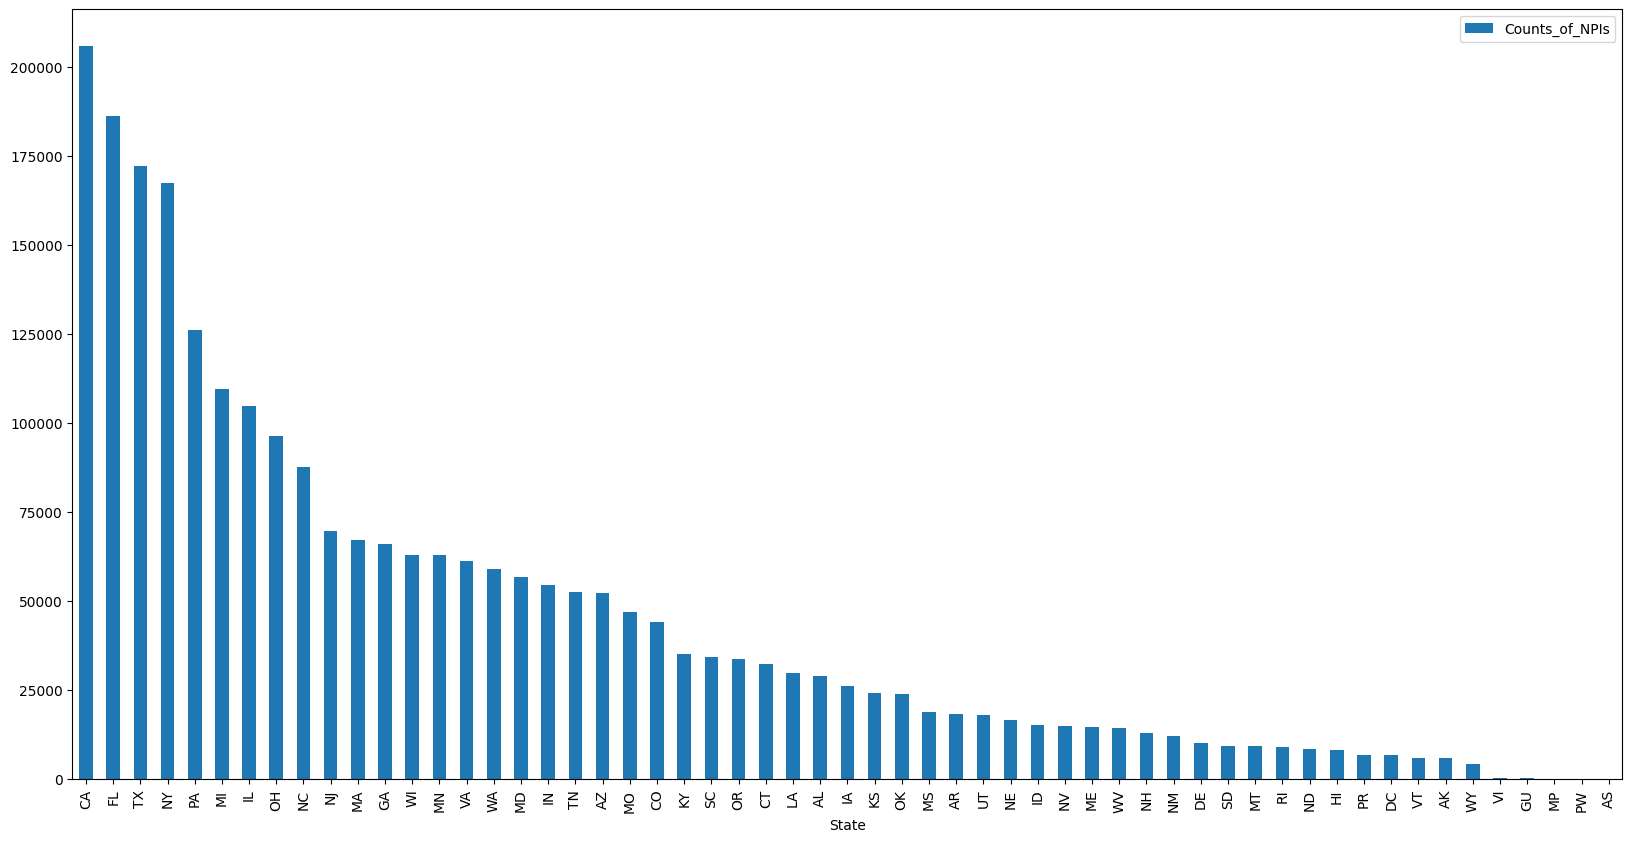

In [13]:
pd.DataFrame(rw_3,columns=['State','Counts_of_NPIs']).plot(kind='bar',x='State',y='Counts_of_NPIs',figsize=(20,10))


In [14]:
res_gp_2,rw_2,hd_2  = CSVtoSQL.execute_and_format(conn,"select NPI, gndr,Grd_yr,\n\
                                                  case when Grd_yr>2000 then 'Graduated after 2000'\n\
                                                  else 'Before 2000' end as before_after\n\
                                                   from my_table\n\
                                                  where gndr <> 'U'")

In [15]:
df=pd.DataFrame(rw_2,columns=['NPI','gender','graduation_year','before_after'])

In [16]:
df=df.groupby(['gender','graduation_year','before_after'])['NPI'].count().reset_index().rename(columns={"NPI":'npi_counts'})

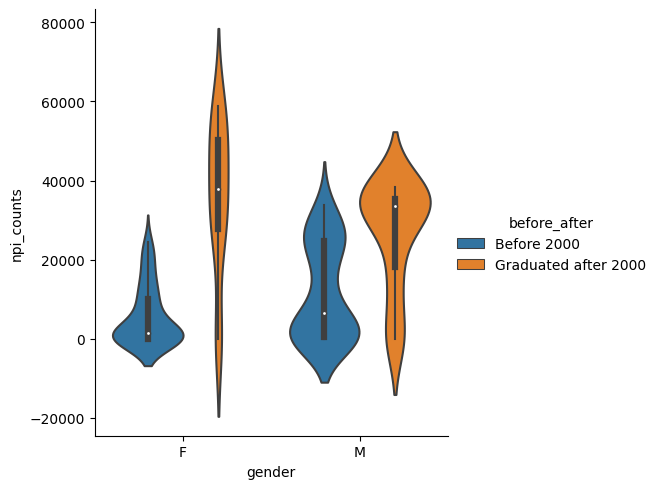

In [17]:
sns.catplot(data=df,y='npi_counts',x='gender',hue='before_after',kind='violin')